In [1]:
import EMHawkes as emh

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv

Test with exponential kernel

In [72]:
timestamps_exp =[]
with open("timestamps_exp.csv", "r", newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        timestamps_exp.append(np.array(row, dtype=np.float64))

EM estimation with a change point in the baseline

In [73]:
ticksEM= emh.EM(timestamps_exp)

In [74]:
params=np.array([10 , 40 , 0.6 , 10])

In [75]:
ticksEM.setEMparam(params, delta=0.8)

In [76]:
ticksEM.EMparam()

In [77]:
ticksEM.mu_0

4.624880354176377

In [78]:
ticksEM.mu_1

45.08784244548234

In [79]:
ticksEM.alpha

0.8090302688607327

In [80]:
ticksEM.beta

100.36448408618429

-> good recovery of the values of the parameters on a simulated dataset

Semi-parametric estimation

In [81]:
ticksEM.setEMnonparam(start_params=np.array([10,40]),  kernel_support=0.1, n_bins_kernel=10, delta=0.8)

In [82]:
ticksEM.EMnonparam()

In [83]:
ticksEM.mu_0

4.622323436599061

In [84]:
ticksEM.mu_1

45.775606323930624

In [85]:
ticksEM.kernel

array([5.15509436e+01, 1.87731223e+01, 7.02877940e+00, 2.11393148e+00,
       1.19049278e+00, 2.02671870e-03, 5.44295339e-04, 2.03906780e-01,
       1.16416037e-02, 2.72135459e-05])

In [ ]:
ticksEM.dtab

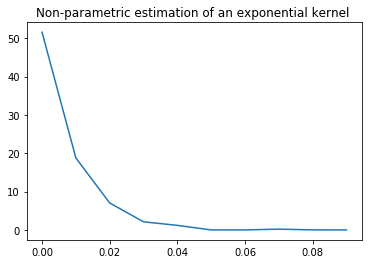

In [86]:
plt.plot([0.01*k for k in range(10)], ticksEM.kernel)
plt.title("Non-parametric estimation of an exponential kernel ")
plt.show()

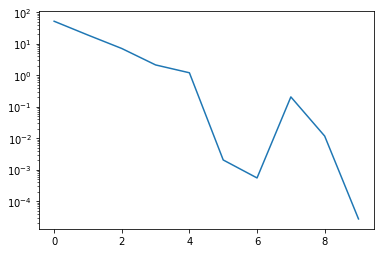

In [93]:
plt.semilogy(ticksEM.kernel)
plt.show()

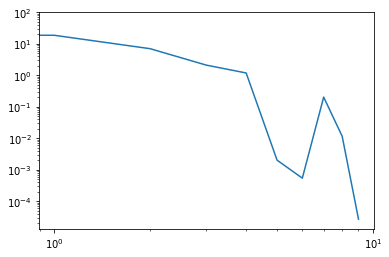

In [95]:
plt.loglog(ticksEM.kernel)
plt.show()

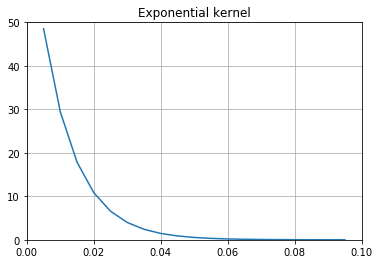

In [88]:
def f(x):
    return 80*np.exp(-100*x)

x = np.arange(0.005,0.1,0.005)
y=f(x)

plt.grid()
plt.xlim(0,0.1)
plt.ylim(0,50)
plt.title("Exponential kernel")
plt.plot(x,y)
plt.show()

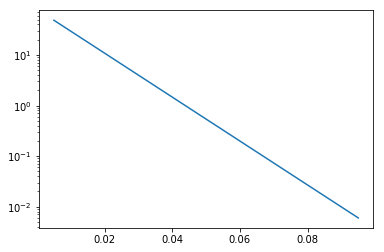

In [90]:
plt.semilogy(x,y)
plt.show()

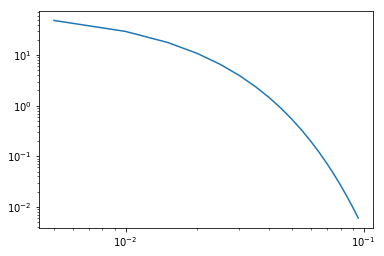

In [91]:
plt.loglog(x,y)
plt.show()

Data simulated with a power law kernel

In [42]:
timestamps_pow =[]
with open("timestamps_pow.csv", "r", newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        timestamps_pow.append(np.array(row, dtype=np.float64))

In [43]:
ticksEMpow= emh.EM(timestamps_pow)

In [66]:
ticksEMpow.setEMnonparam(start_params=np.array([10,40]),  kernel_support=1, n_bins_kernel=16, delta=0.8)

In [67]:
ticksEMpow.EMnonparam()

In [68]:
ticksEMpow.mu_0

4.460216320671286

In [69]:
ticksEMpow.mu_1

48.45568060975849

In [70]:
ticksEMpow.kernel

array([3.97034439e+00, 1.73903607e+00, 5.79175626e-01, 9.54640457e-01,
       1.44355776e-01, 1.79934452e-02, 7.36381222e-01, 6.91751626e-03,
       9.62124173e-01, 4.18741436e-03, 1.30085342e-02, 8.34193725e-01,
       1.66397490e+00, 1.64714154e-05, 5.62429256e-10, 3.69204633e-02])

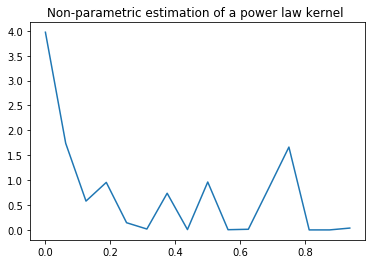

In [71]:
plt.plot([k/16 for k in range(16)], ticksEMpow.kernel)
plt.title("Non-parametric estimation of a power law kernel ")
plt.show()

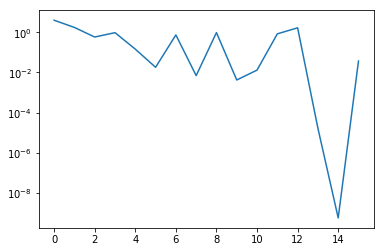

In [101]:
plt.semilogy(ticksEMpow.kernel)
plt.show()

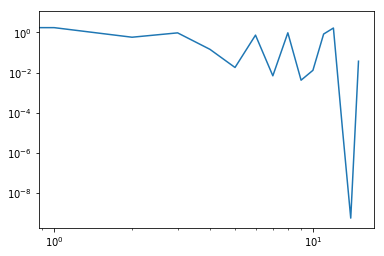

In [102]:
plt.loglog(ticksEMpow.kernel)
plt.show()

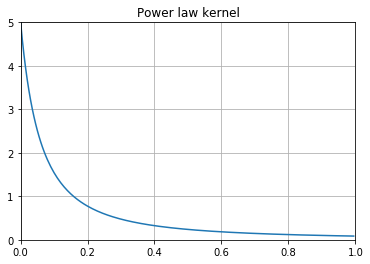

In [98]:
def g(x):
    return 0.1*np.power(x+0.1,-1.7)

x = np.arange(0,1,0.005)
y=g(x)

plt.grid()
plt.xlim(0,1)
plt.ylim(0,5)
plt.title("Power law kernel")
plt.plot(x,y)
plt.show()

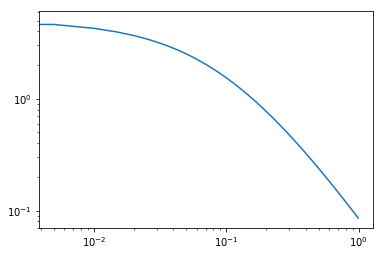

In [99]:
plt.loglog(x,y)
plt.show()

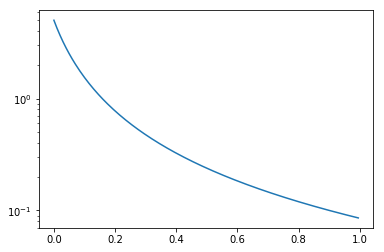

In [100]:
plt.semilogy(x,y)
plt.show()

Now try it on real dataset

In [103]:
import pandas as pd

In [104]:
df_avril =pd.read_csv(filepath_or_buffer="dates_avril_2015.csv", parse_dates=['date'])
liste_date = df_avril['date'].tolist()
n = len(liste_date)
filename_a ="timestamp_"
filename_c =".csv"
filename_ps_a ="delivery_start_"
ticks_avril_2015 = []
for i in range(n):
    s = filename_a + str(i) + filename_c
    s_ps = filename_ps_a + str(i) + filename_c    
    df_i = pd.read_csv(filepath_or_buffer=s, parse_dates=['timestamp'])
    df_ps_i = pd.read_csv(filepath_or_buffer=s_ps, parse_dates=['trading_start']) 
    ticks_avril_2015.append((np.float64(df_i['timestamp'].values - df_ps_i['trading_start'].values))/(1e9*3600*8.25))

In [105]:
dataEM= emh.EM(ticks_avril_2015)

In [106]:
dataEM.setEMparam(params, delta=0.85)

In [107]:
dataEM.EMparam()

In [108]:
dataEM.mu_0

9.145334111462146

In [109]:
dataEM.mu_1

119.21843295685626

In [110]:
dataEM.alpha

0.349785019458153

In [111]:
dataEM.beta

2804.5071809643214

In [112]:
dataEM.setEMnonparam(start_params=np.array([10,100]),  kernel_support=0.3, n_bins_kernel=20, delta=0.82)

In [113]:
dataEM.EMnonparam()

In [114]:
dataEM.mu_0

2.6818711047632555

In [115]:
dataEM.mu_1

36.15862841638895

In [116]:
dataEM.kernel

array([3.05230924e+01, 9.28591034e+00, 3.39969565e+00, 4.93083428e+00,
       2.89254366e+00, 2.54811404e+00, 5.93887114e+00, 8.59203456e-02,
       2.84563947e+00, 9.93538574e-01, 1.42363879e+00, 4.44398990e+00,
       1.04499762e-07, 7.89655757e-01, 7.25545718e-01, 1.92683192e+00,
       1.78294507e+00, 3.78335220e+00, 4.65570173e-10, 1.68366245e+00])

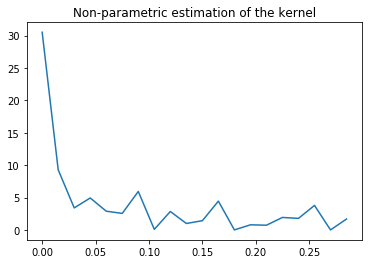

In [117]:
plt.plot([0.015*k for k in range(20)], dataEM.kernel)
plt.title("Non-parametric estimation of the kernel")
plt.show()

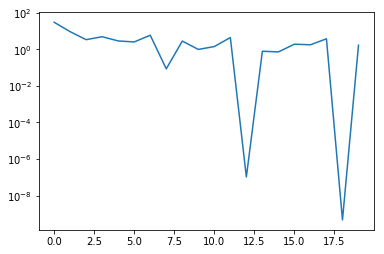

In [119]:
plt.semilogy(dataEM.kernel)
plt.show()

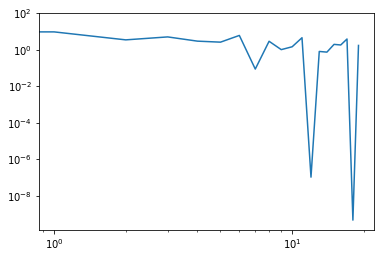

In [120]:
plt.loglog(dataEM.kernel)
plt.show()

Full non parametric estimation

In [ ]:
import EM

In [ ]:
test = EM.EM(kernel_support=0.1,n_bins_baseline=5, n_bins_kernel=10)

In [ ]:
test.fit(timestamps_exp)

In [ ]:
test.baseline

In [ ]:
test.kernel

In [ ]:
plt.plot([0.01*k for k in range(10)], test.kernel)
plt.title("Non-parametric estimation of an exponential kernel ")
plt.show()

In [ ]:
plt.plot([0.2*k for k in range(5)], test.baseline)
plt.title("Non-parametric estimation of a piecewise constant baseline ")
plt.show()

In [ ]:
testdata = EM.EM(kernel_support=0.3,n_bins_baseline=10, n_bins_kernel=20)

In [ ]:
testdata.fit(ticks_avril_2015)

In [ ]:
testdata.baseline

In [ ]:
testdata.kernel

In [ ]:
plt.plot([0.015*k for k in range(20)], testdata.kernel)
plt.title("Non-parametric estimation of the kernel ")
plt.show()